In [1]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


     ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
     --------------------------------------- 0.0/15.2 MB 660.6 kB/s eta 0:00:23
     --------------------------------------- 0.1/15.2 MB 787.7 kB/s eta 0:00:20
      --------------------------------------- 0.2/15.2 MB 1.7 MB/s eta 0:00:09
      --------------------------------------- 0.4/15.2 MB 2.0 MB/s eta 0:00:08
     - -------------------------------------- 0.5/15.2 MB 2.2 MB/s eta 0:00:07
     - -------------------------------------- 0.6/15.2 MB 2.3 MB/s eta 0:00:07
     - -------------------------------------- 0.7/15.2 MB 2.3 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/15.2 MB 2.4 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/15.2 MB 2.4 MB/s eta 0:00:06
     -- ------------------------------------- 1.1/15.2 MB 2.5 MB/s eta 0:00:06
     --- ------------------------------------ 1.2/15.2 MB 2.5 MB/s eta 0:00:06
     --- ------------------------------------ 1.3/15.2 M

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\farra\\anaconda3\\envs\\machine-learning-1\\Lib\\site-packages\\~rapt\\_wrappers.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
# train_data = pd.read_csv('train_data.csv').drop('Timestamp', axis=1)
train_data = pd.read_csv('train_data_denoise.csv').drop('Unnamed: 0', axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64381 entries, 0 to 64380
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   PT N2 'C' Speed                        64381 non-null  float64
 1   Gear High Speed Drive End X Vibr       64381 non-null  float64
 2   Gear High Speed Drive End Y Vibr       64381 non-null  float64
 3   Gear High Speed Non-Drive End X Vibr   64381 non-null  float64
 4   Gear High Speed Non-Drive End Y Vibr   64381 non-null  float64
 5   Gear LS Shaft Axial Displ 1            64381 non-null  float64
 6   Gear LS Shaft Axial Displ 2            64381 non-null  float64
 7   Gear Low Speed Drive End X Vibr        64381 non-null  float64
 8   Gear Low Speed DriveEnd Y Vibr         64381 non-null  float64
 9   Gear Low Speed Non-Drive End X Vibr    64381 non-null  float64
 10  Gear Low Speed Non-Drive End Y Vibr    64381 non-null  float64
 11  PT

In [3]:
# train_data.plot(subplots=True, figsize=(20,60))

In [3]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler, StandardScaler


features = train_data.columns.to_list()
# Define scaler dictionary
features_scaler = {}

for col in features:
    # define MinMaxScaler
    # scaler = MinMaxScaler(feature_range=(0,1))
    scaler = StandardScaler()
    # fit and transform data with scaler for all features selected
    data_scale = scaler.fit_transform(train_data[col].values.reshape(-1,1))
    data_scale = np.reshape(data_scale, len(data_scale))
    features_scaler['scaler_'+ col] = scaler
    train_data[col] = data_scale

# delete unused variable and flush memory
del data_scale
del col
gc.collect()

0

In [4]:
from keras.models import Sequential
from keras.layers import Dense

input_dim = 31 # jumlah dimensi input

# inisialisasi model
model = Sequential() 
# lapisan encoder
model.add(Dense(25, activation='relu', input_shape=(input_dim,)))
# lapisan latent
model.add(Dense(7, activation='relu'))
# lapisan decoder
model.add(Dense(25, activation='relu'))
# lapisan output
model.add(Dense(input_dim))
model.compile(optimizer='adam', loss='mse')

In [5]:
model.save('model_test_je.h5')

In [6]:
# from keras import optimizers
# from keras.models import Sequential
# from keras.layers import Dense

# def autoencoder_model(dimension):
#     model = Sequential()
#     model.add(Dense(60, input_dim=dimension, activation='relu'))
#     model.add(Dense(20,activation='relu'))
#     model.add(Dense(5, activation='relu'))
#     model.add(Dense(20,activation='relu'))
#     model.add(Dense(60,activation='relu'))
#     model.add(Dense(dimension, activation='linear'))
#     model.compile(loss='mse', optimizer=optimizers.Adam(0.0005))
#     return model

# model_ae = autoencoder_model(len(features))
# model_ae.summary()

In [6]:
from keras.callbacks import EarlyStopping

history = model.fit(train_data.values, train_data.values, validation_split=0.2, epochs=30, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=5)])

Epoch 1/30
1610/1610 [==============================] - 6s 3ms/step - loss: 0.1239 - val_loss: 0.1883
Epoch 2/30
1610/1610 [==============================] - 4s 3ms/step - loss: 0.0125 - val_loss: 0.1279
Epoch 3/30
1610/1610 [==============================] - 4s 3ms/step - loss: 0.0071 - val_loss: 0.1236
Epoch 4/30
1610/1610 [==============================] - 6s 4ms/step - loss: 0.0054 - val_loss: 0.1315
Epoch 5/30
1610/1610 [==============================] - 6s 3ms/step - loss: 0.0046 - val_loss: 0.1210
Epoch 6/30
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0041 - val_loss: 0.1121
Epoch 7/30
1610/1610 [==============================] - 6s 4ms/step - loss: 0.0037 - val_loss: 0.1040
Epoch 8/30
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0034 - val_loss: 0.0945
Epoch 9/30
1610/1610 [==============================] - 5s 3ms/step - loss: 0.0032 - val_loss: 0.0879
Epoch 10/30
1610/1610 [==============================] - 5s 3ms/step - loss: 0.003

In [7]:
# save history to json
import json
with open('history.json', 'w') as f:
    json.dump(history.history, f)

In [8]:
# Helper function for selecting data easier
def data_selector(data, features, time_range_low=None, time_range_high=None):
    if time_range_low != None and time_range_high != None:
        data_selected_time = data.loc[(data['Timestamp'] >= time_range_low) & (data['Timestamp'] <= time_range_high)]
    elif time_range_low != None:
        data_selected_time = data.loc[(data['Timestamp'] >= time_range_low)]
    elif time_range_high != None:
        data_selected_time = data.loc[(data['Timestamp'] <= time_range_low)]
    data_selected = data_selected_time[features]
    return data_selected

In [9]:
df = pd.read_csv('BLD-LGC PTGBX 26 JUL21-8FEB23_edited.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')
df.head()

,Timestamp,PT N2 'C' Speed,Gear High Speed Drive End X Vibr,Gear High Speed Drive End Y Vibr,Gear High Speed Non-Drive End X Vibr,Gear High Speed Non-Drive End Y Vibr,Gear LS Shaft Axial Displ 1,Gear LS Shaft Axial Displ 2,Gear Low Speed Drive End X Vibr,Gear Low Speed DriveEnd Y Vibr,...,Gear LS Drive End Jrnl Brg Temp,Gear LS Inboard Thrust Brg Temp,LO Supply Press,LO Cooler Outlet Temp,Pt Thrust Brg Temp,Pt Coupling End Temp,Pt Disch End Temp,PT Rim Cooling 1&2 Temp,PT Rim Cooling 3&4 Temp,Gear LS Non-Drive End Jrnl Brg Temp
0,2021-07-26 05:45:00,5128.723145,0.296389,0.413373,0.324846,0.491988,10.041477,10.557626,0.379022,0.364291,...,196.280426,127.332596,22.722622,106.153740,139.316666,175.296387,188.311005,779.865906,780.616089,194.377380
1,2021-07-26 05:50:00,5130.262207,0.294855,0.405914,0.325042,0.491340,10.247612,10.784430,0.377899,0.370086,...,196.279938,128.343506,22.721077,107.099617,140.253220,175.291733,188.305359,786.046692,786.820435,195.333084
2,2021-07-26 05:55:00,5121.144531,0.301340,0.405914,0.325830,0.488259,10.378461,10.921785,0.378085,0.366067,...,197.281021,128.869064,22.755575,108.105850,141.249649,175.291733,188.305847,788.598450,789.264954,196.334168
3,2021-07-26 06:00:00,5084.938965,0.308058,0.412083,0.325131,0.495821,10.512401,11.064705,0.373516,0.360375,...,197.281509,129.344574,22.786861,109.097611,141.249649,175.296387,186.298523,789.723938,790.908203,196.329010
4,2021-07-26 06:05:00,5090.241699,0.313758,0.430409,0.322932,0.492476,10.477362,11.035732,0.378831,0.362193,...,197.281021,129.344574,22.748289,109.106941,141.249649,175.296387,186.323547,787.269226,788.036560,195.362763


array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>], dtype=object)

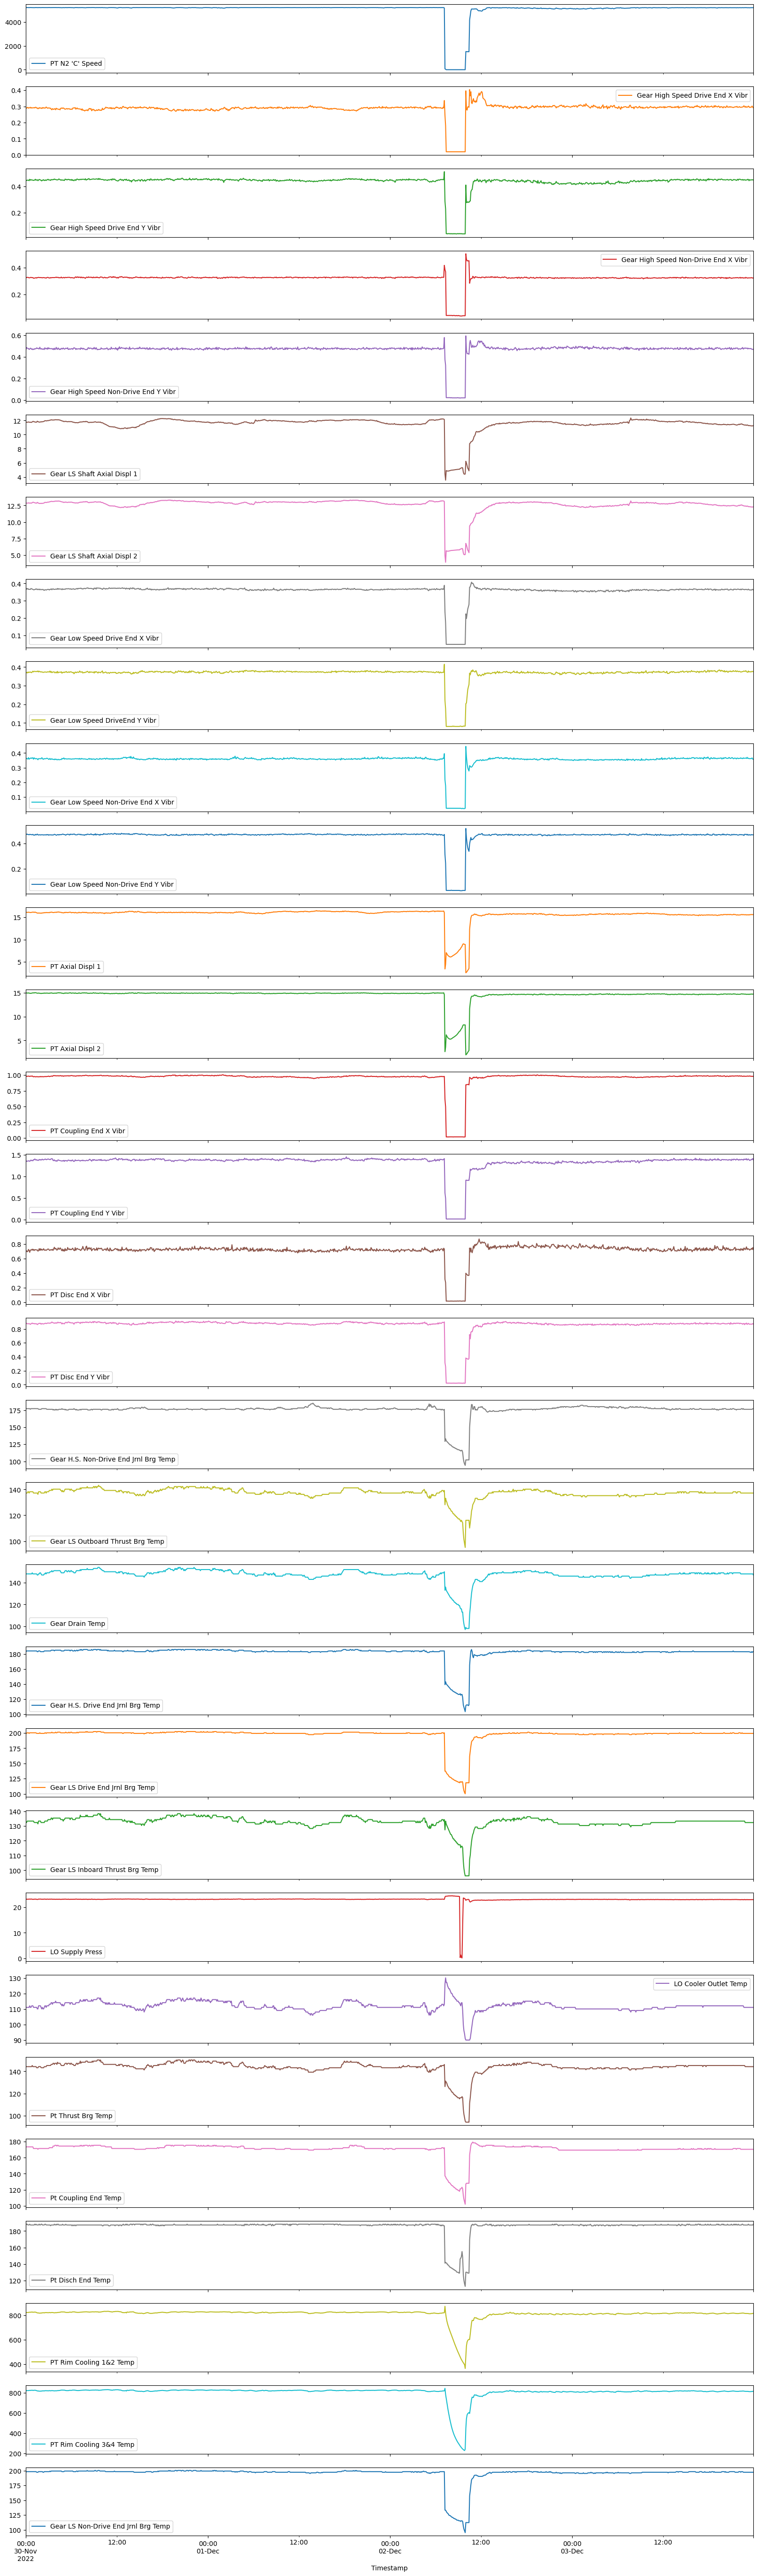

In [10]:
data_test = data_selector(df, df.columns, '2022-11-30 00:00:00','2022-12-03 23:59:59')
data_test.plot(x='Timestamp', subplots=True, figsize=(20,70))

In [11]:
data_test.drop('Timestamp', axis=1, inplace=True)

for col in features:
    # define MinMaxScaler
    scaler = features_scaler['scaler_'+col]
    # fit and transform data with scaler for all features selected
    data_scale = scaler.fit_transform(data_test[col].values.reshape(-1,1))
    data_scale = np.reshape(data_scale, len(data_scale))
    # features_scaler['scaler_'+ col] = scaler
    data_test[col] = data_scale

In [12]:
prediction_t = []

for i, data_t in enumerate(np.array_split(data_test, 10)):
    prediction_t.append(model_ae.predict(data_t.values))

4/4 [==============================] - 0s 2ms/step


In [13]:
data_test.reset_index(inplace=True, drop=True)
pred = pd.DataFrame([item for sublist in prediction_t for item in sublist])

In [14]:
for i, col in enumerate(features):
    # define MinMaxScaler
    scaler = features_scaler['scaler_'+ col]
    # fit and transform data with scaler for all features selected
    data_scale = scaler.inverse_transform(data_test[col].values.reshape(-1,1))
    data_scale = np.reshape(data_scale, len(data_scale))
    data_test[col] = data_scale

    data_scale = scaler.inverse_transform(pred[i].values.reshape(-1,1))
    data_scale = np.reshape(data_scale, len(data_scale))
    pred[i] = data_scale

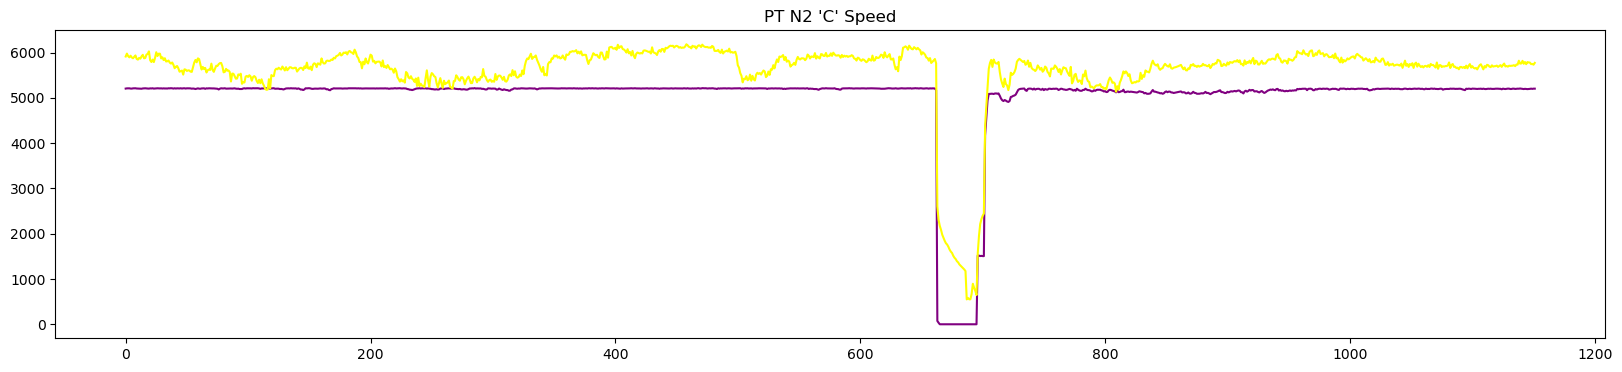

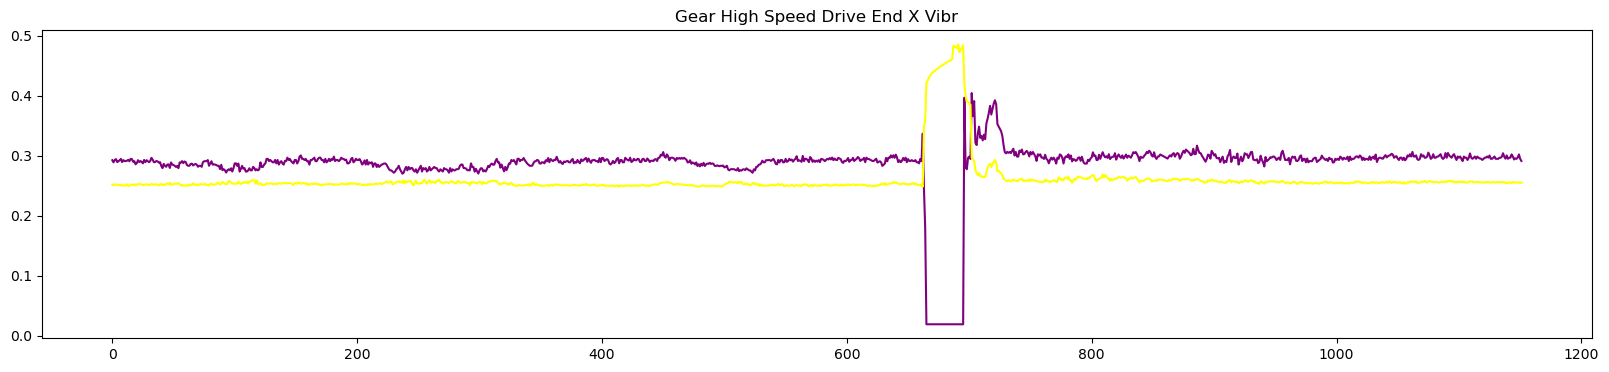

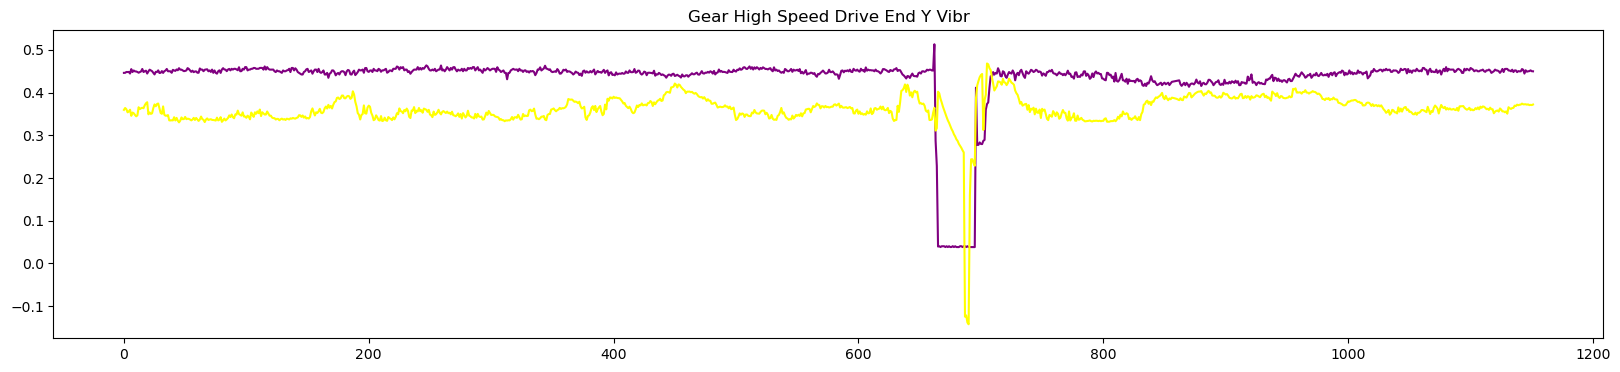

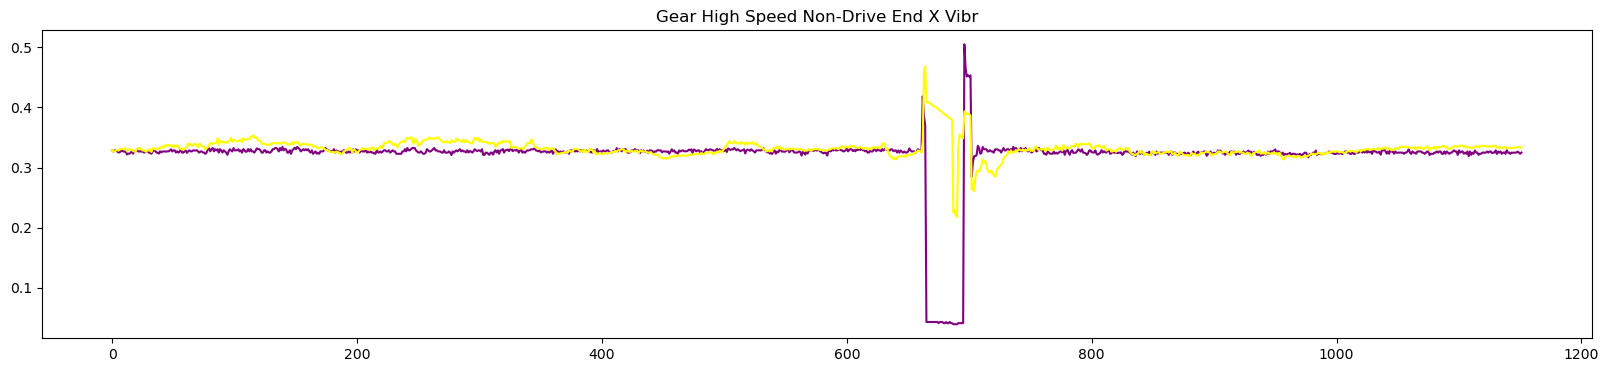

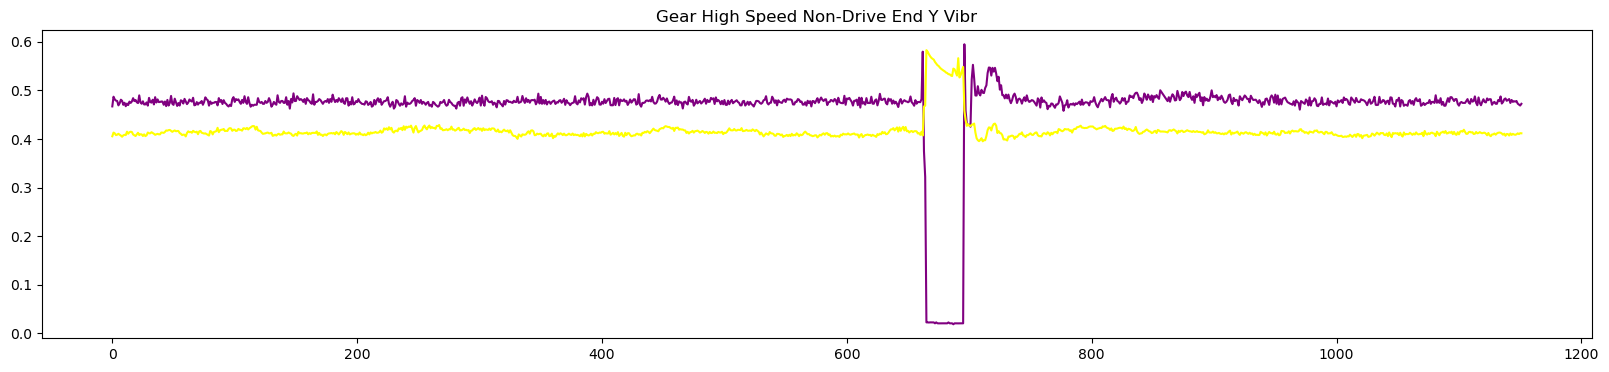

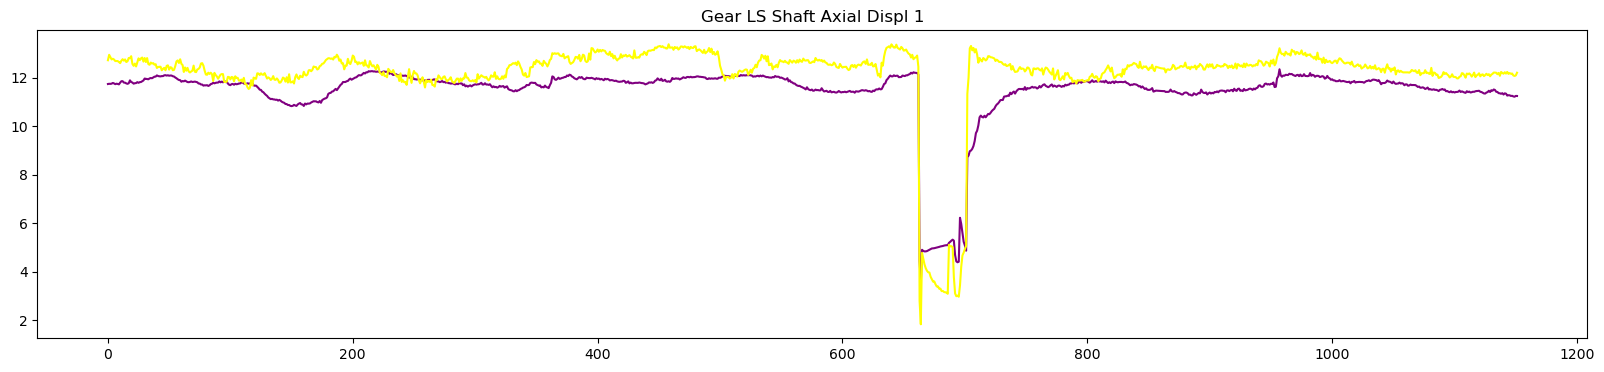

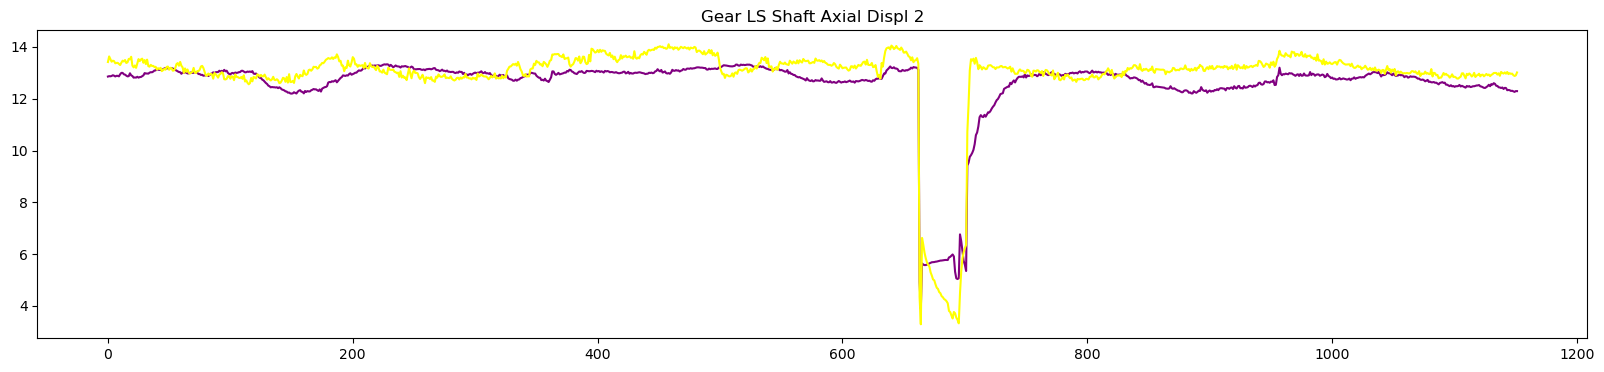

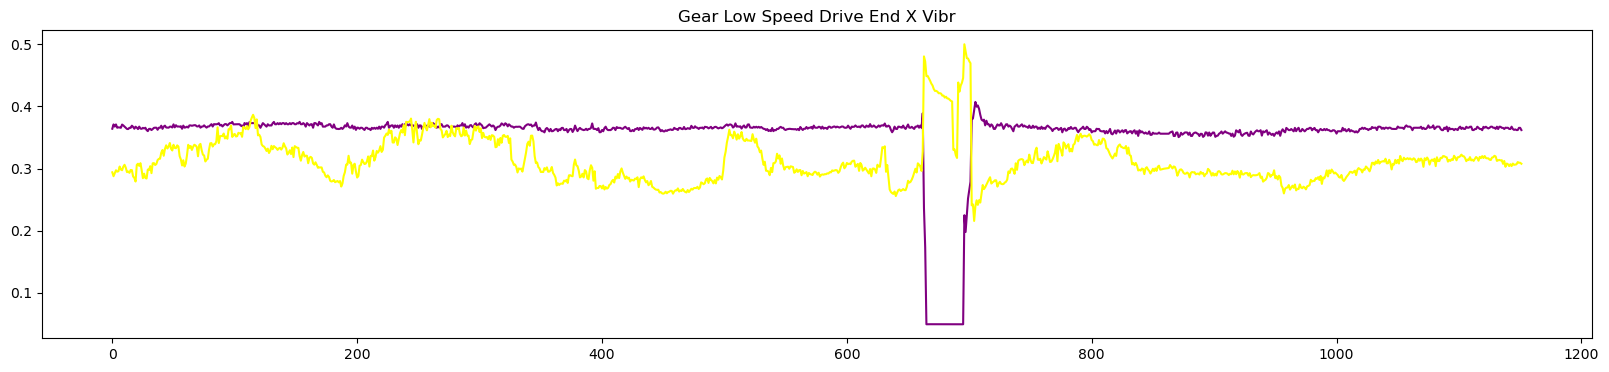

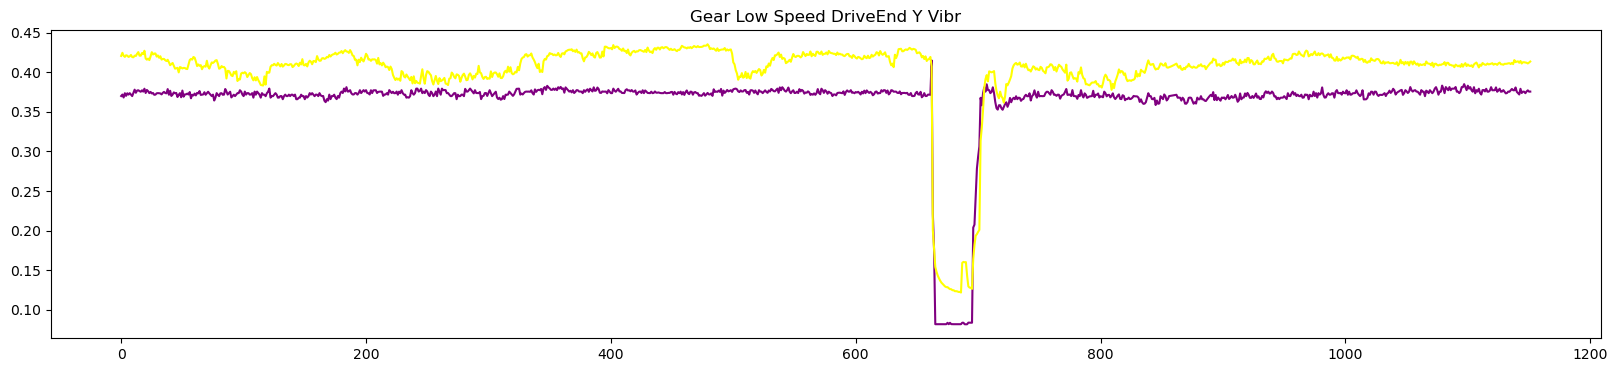

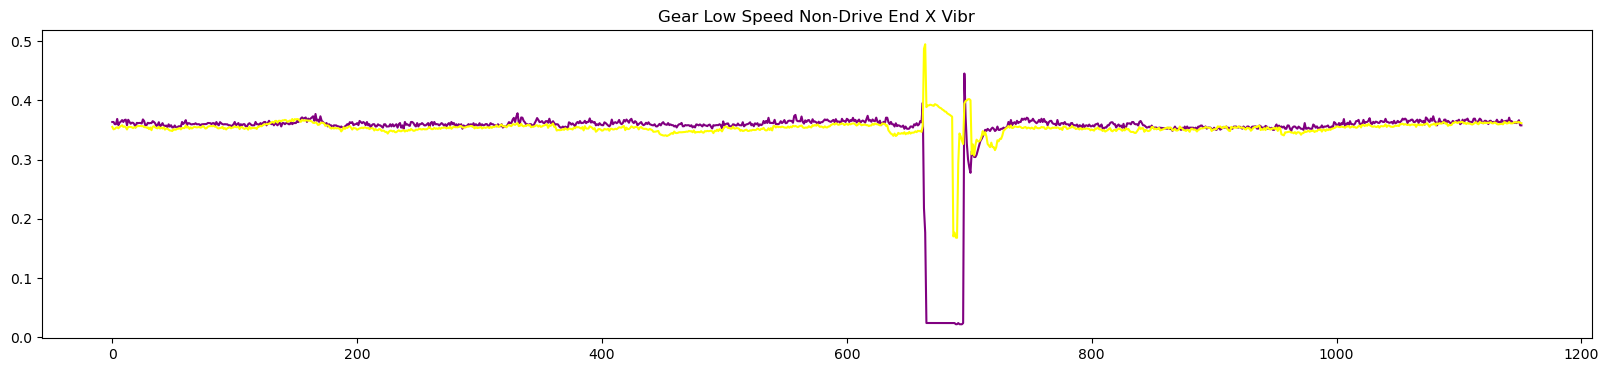

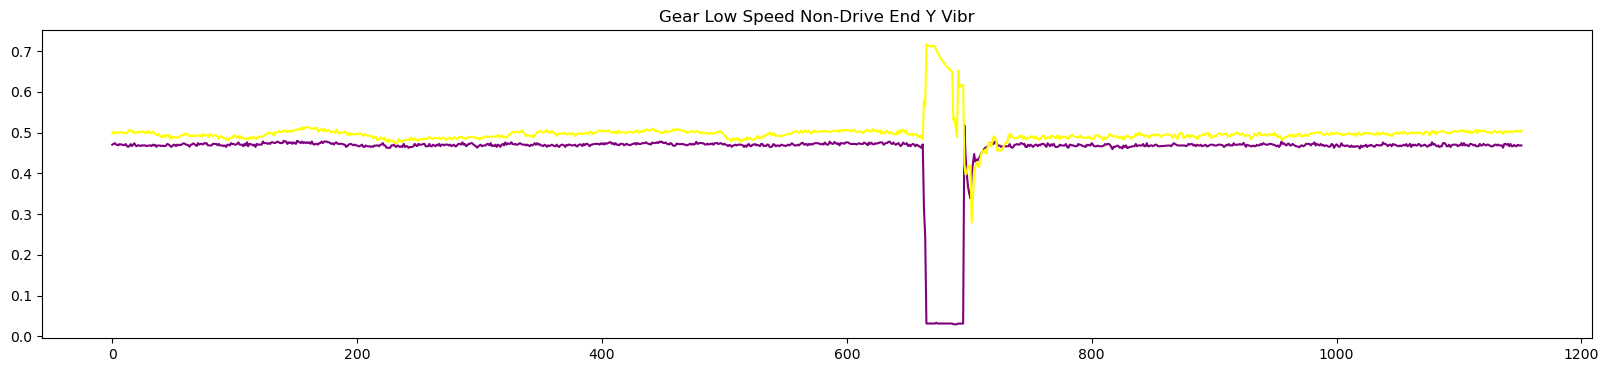

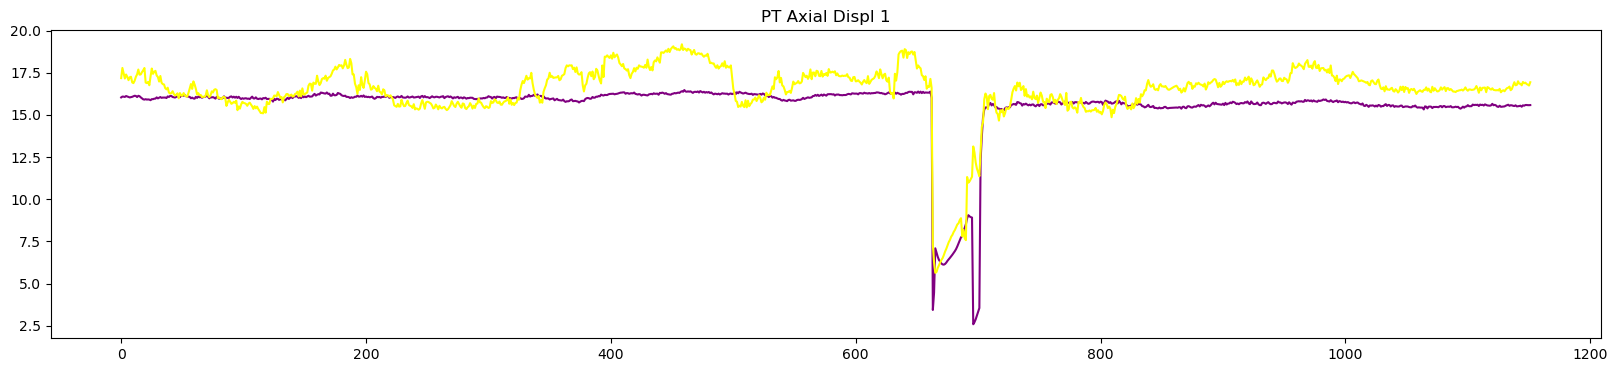

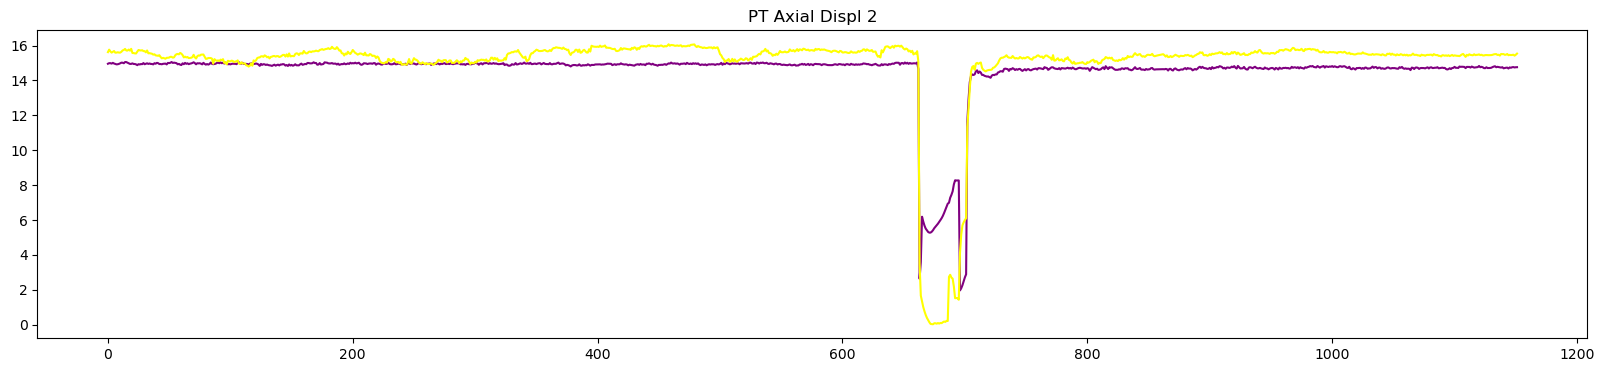

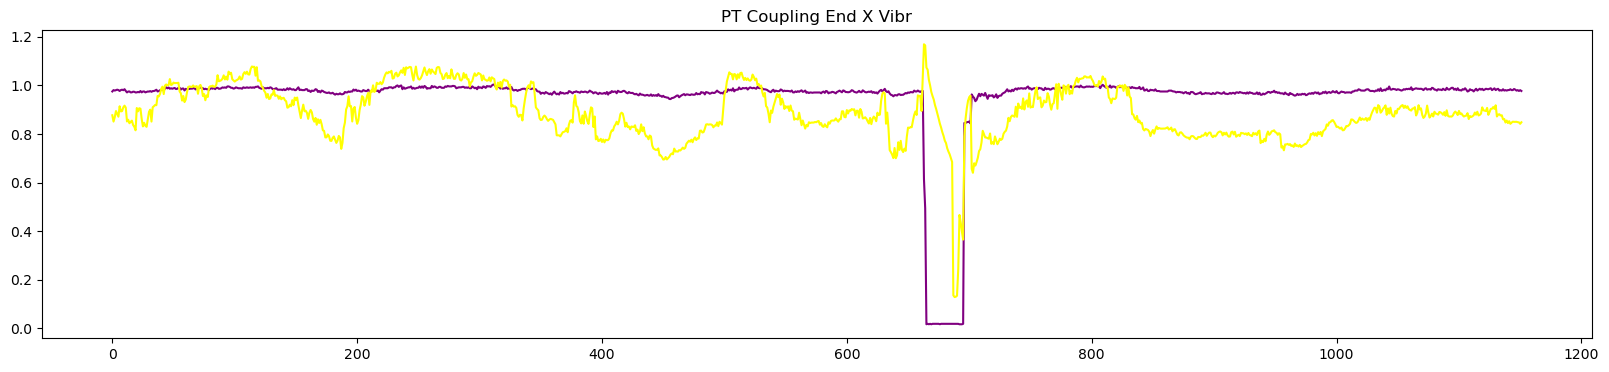

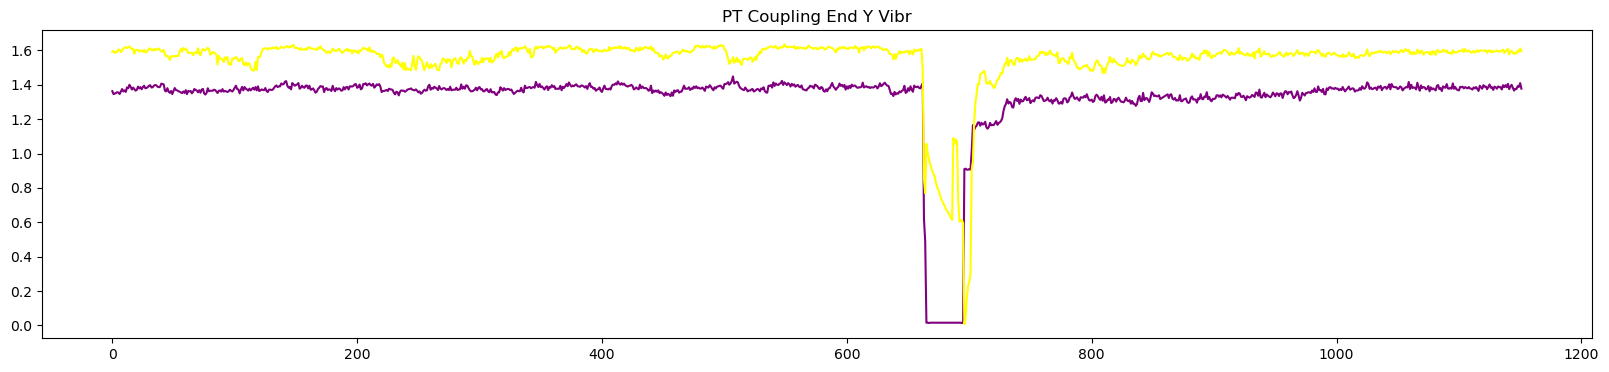

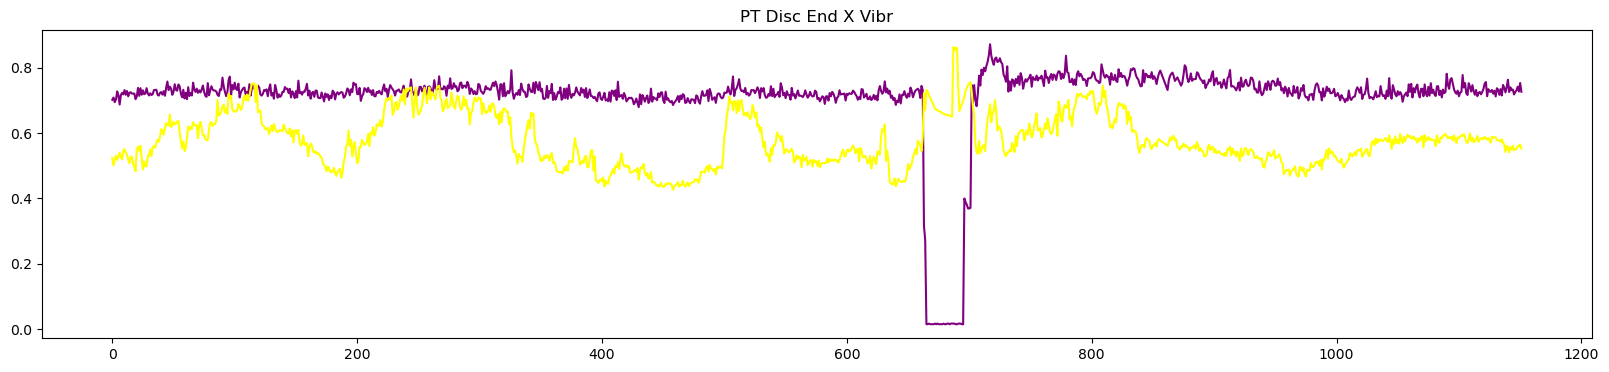

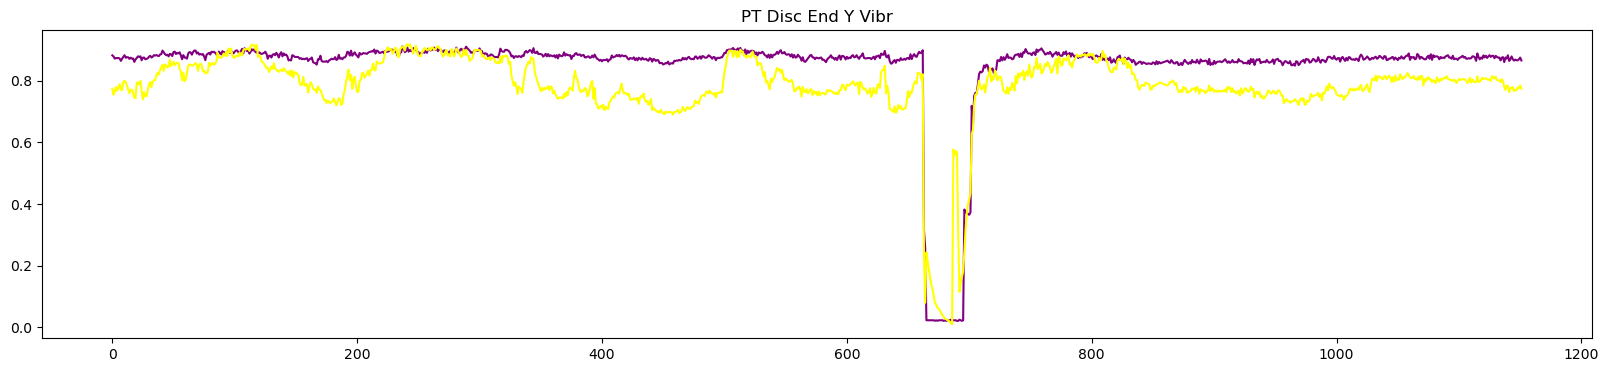

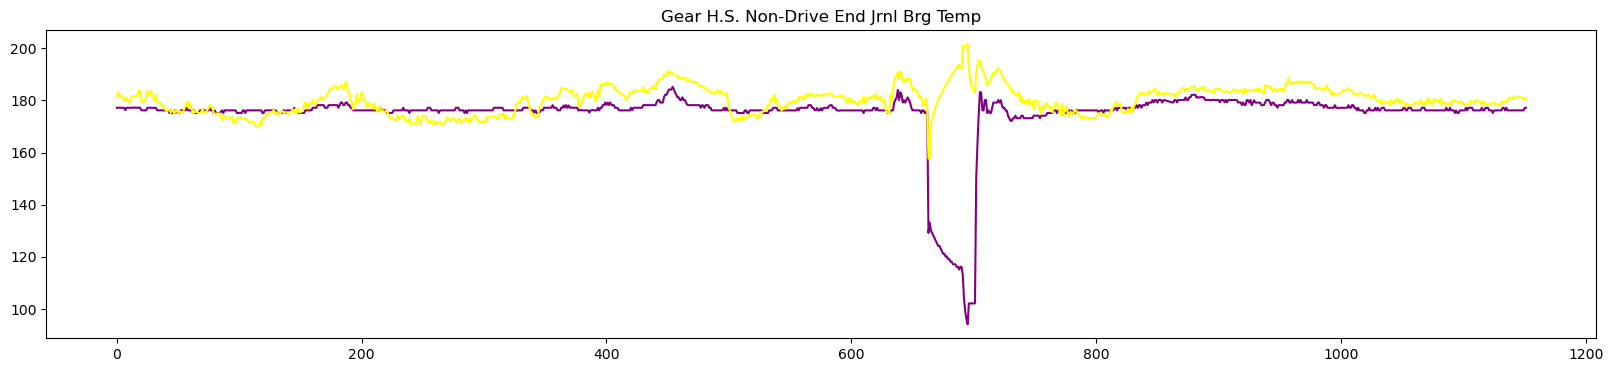

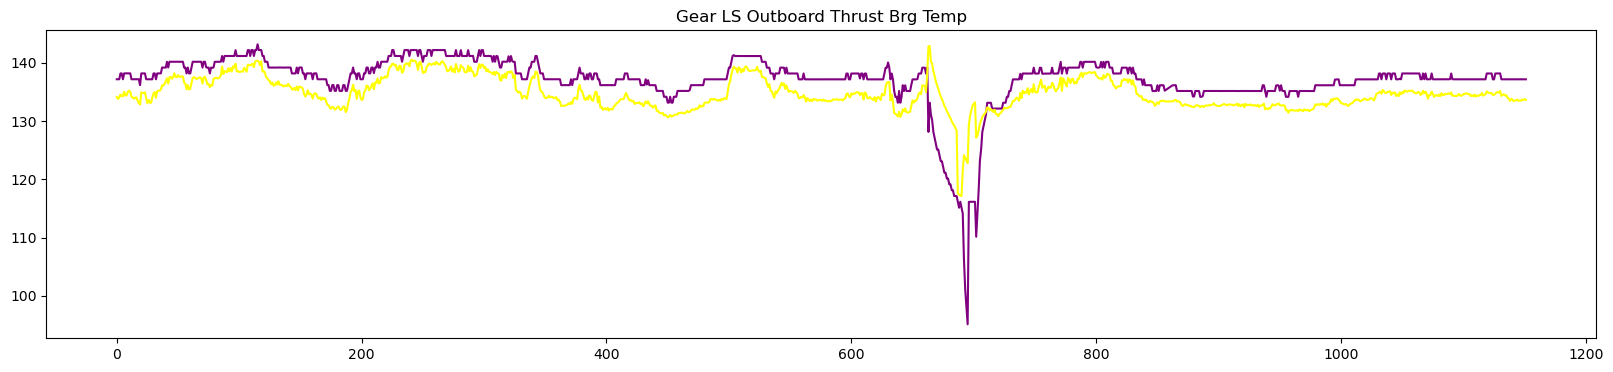

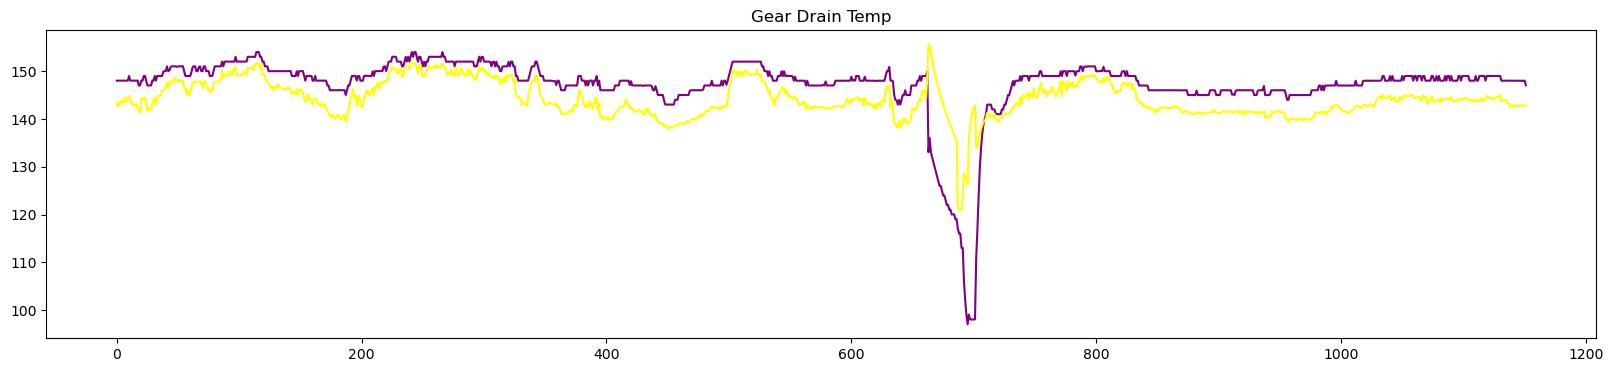

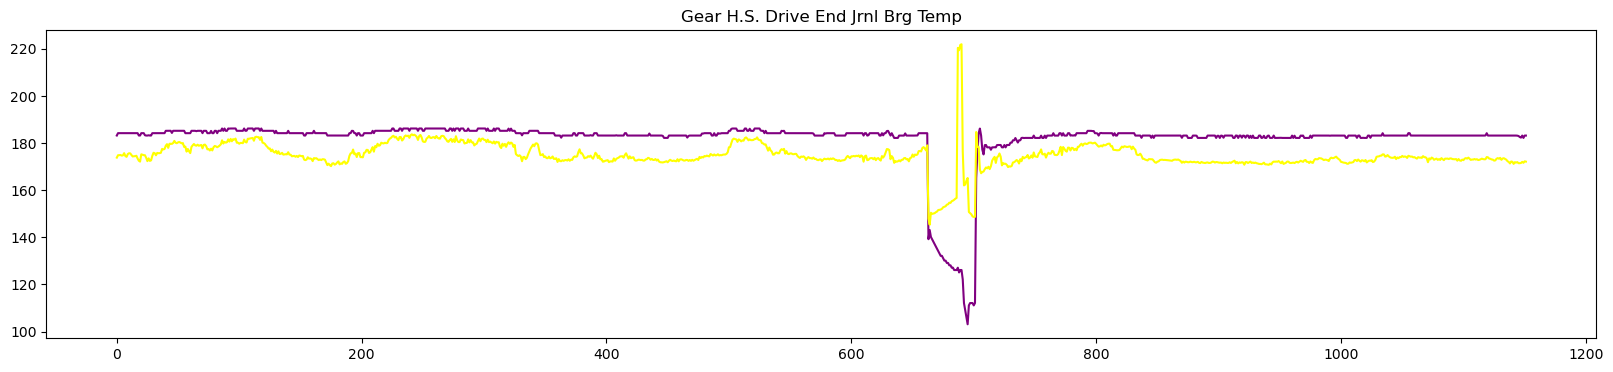

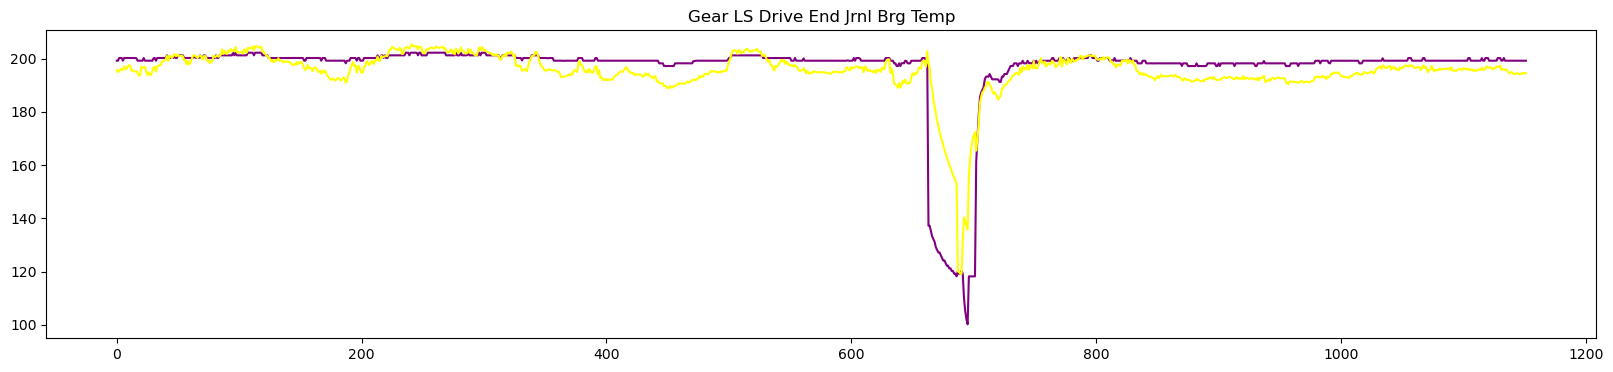

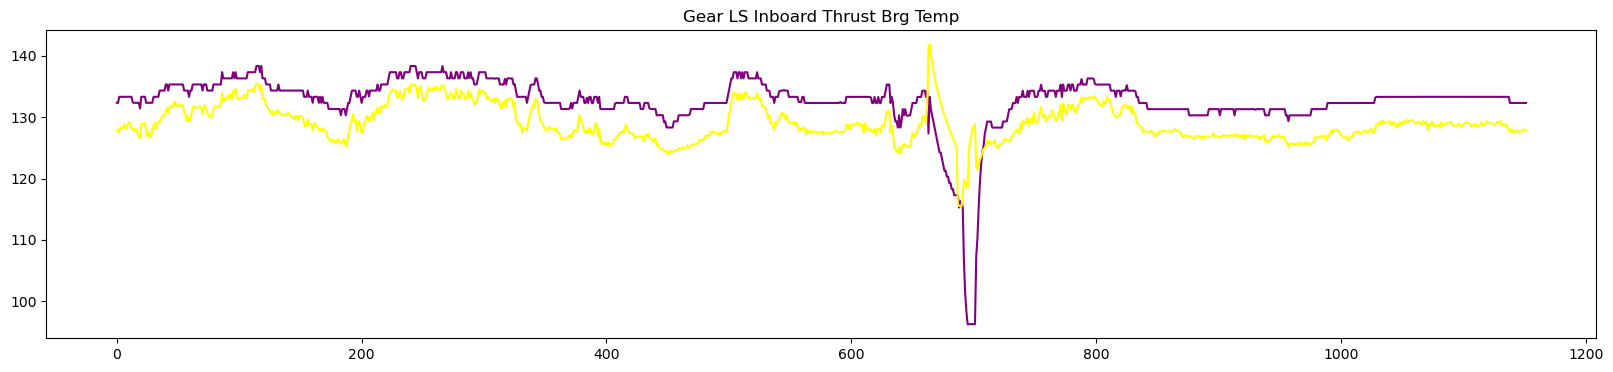

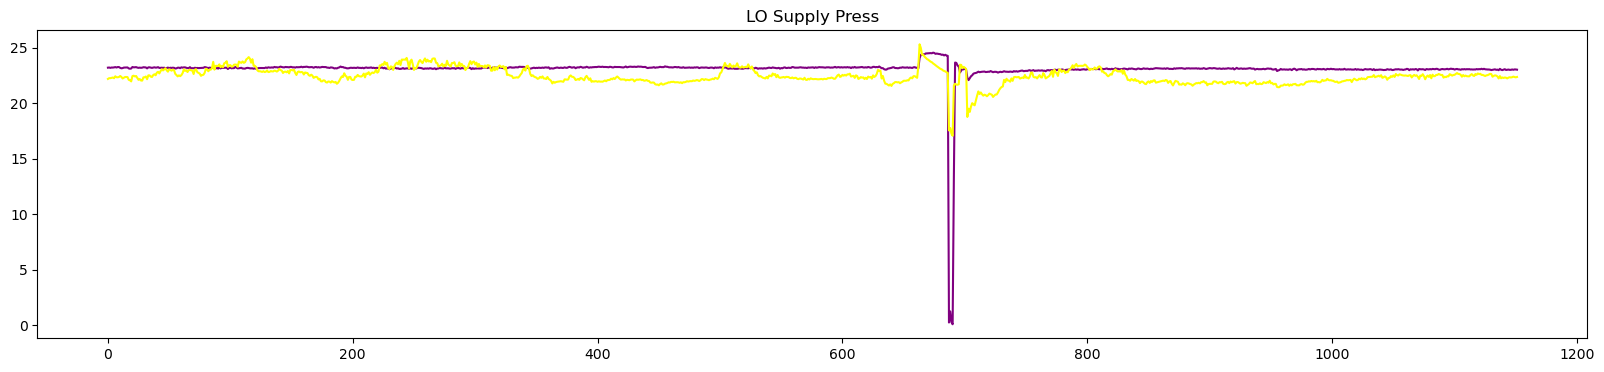

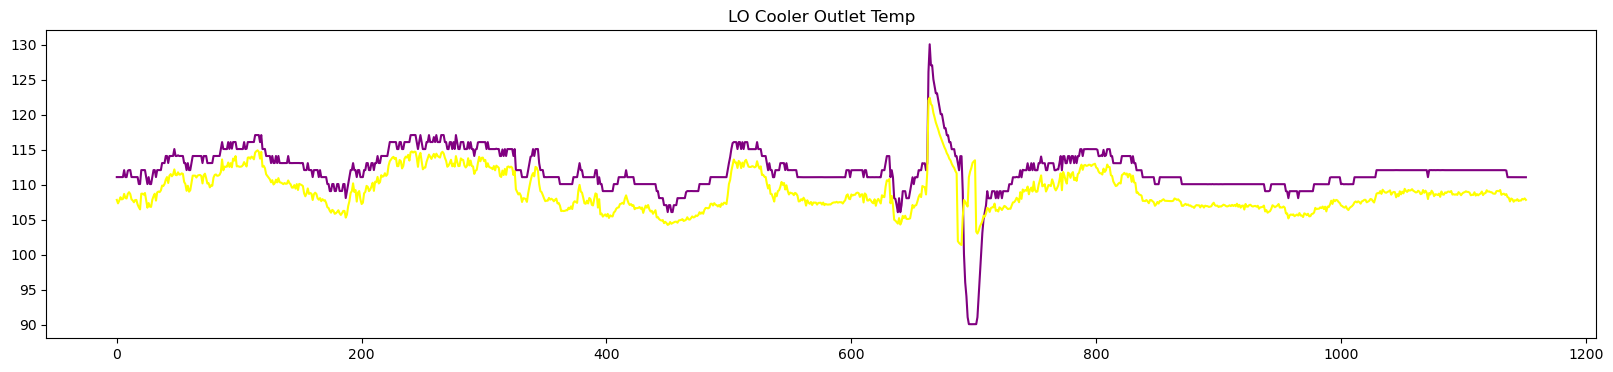

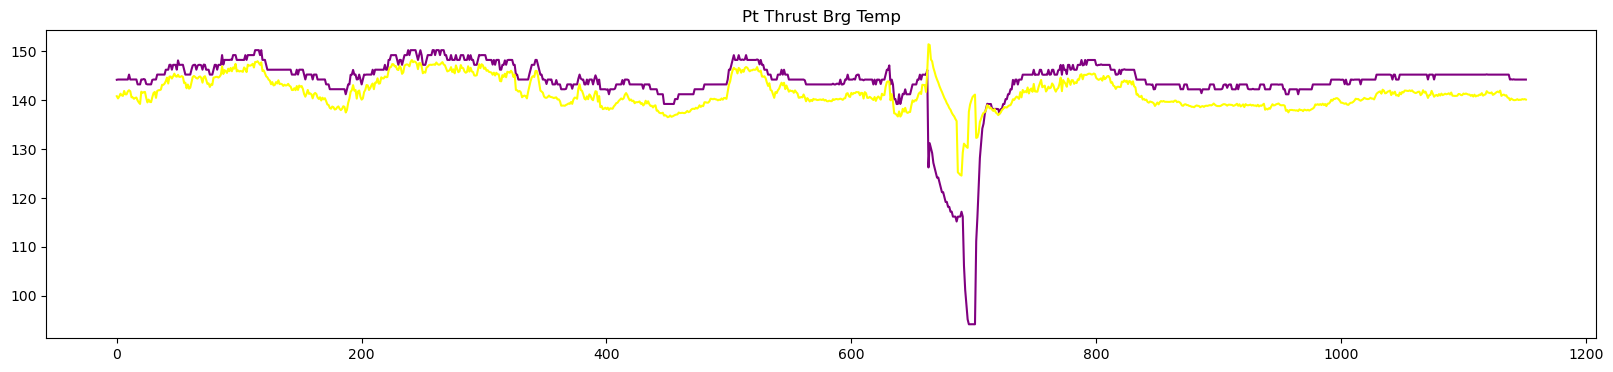

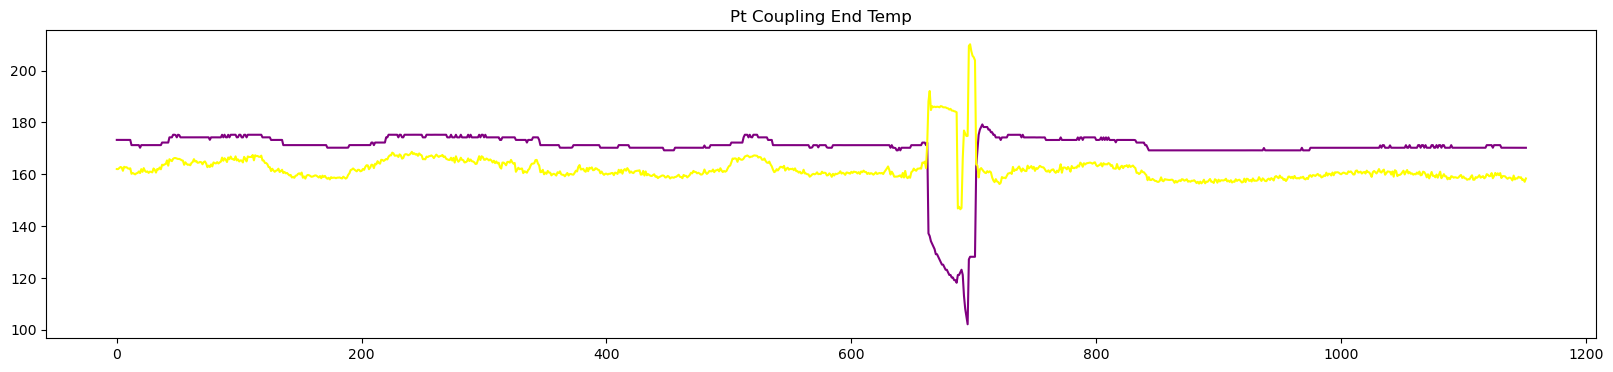

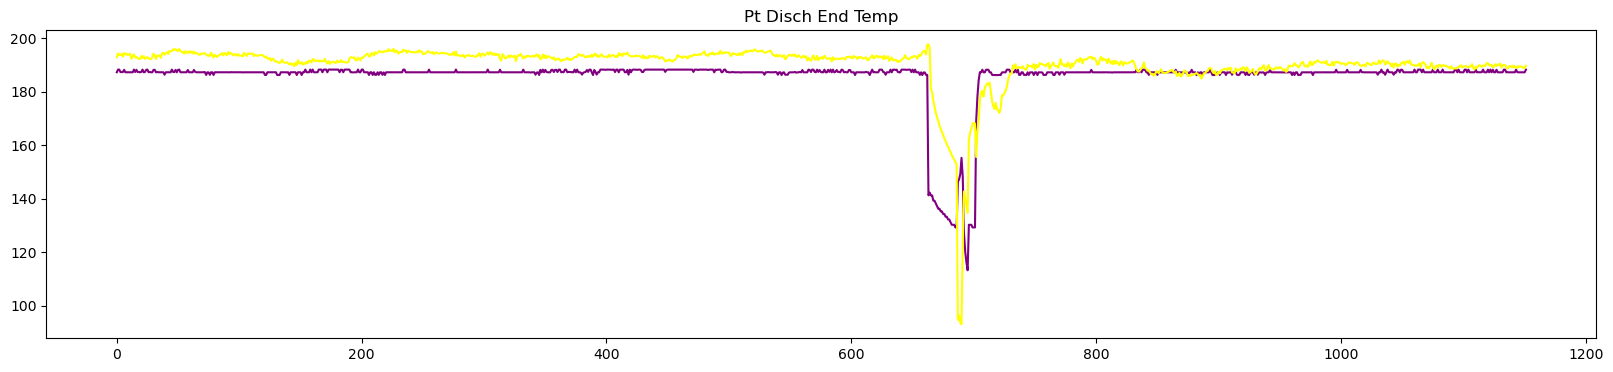

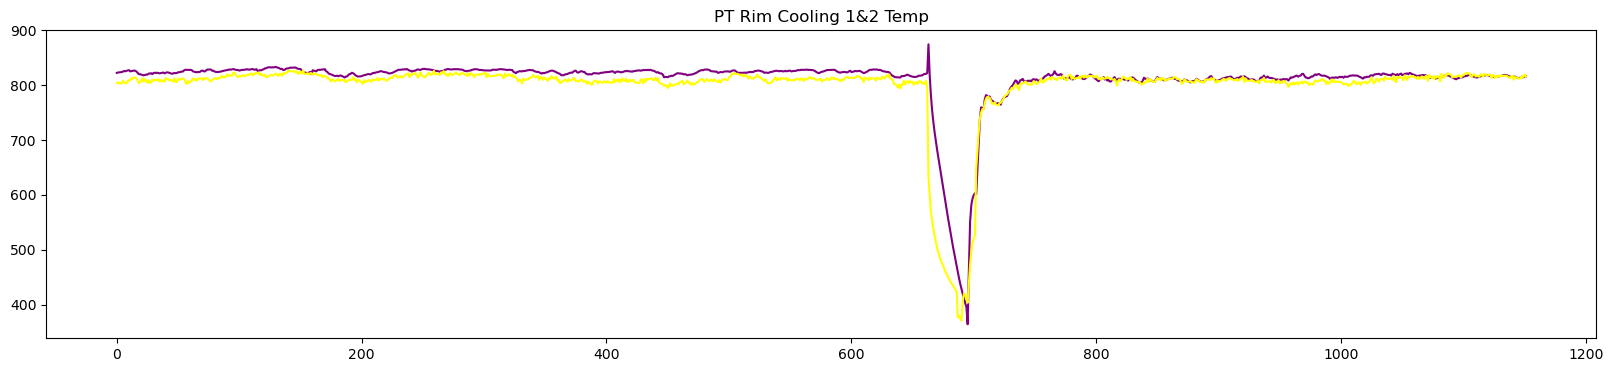

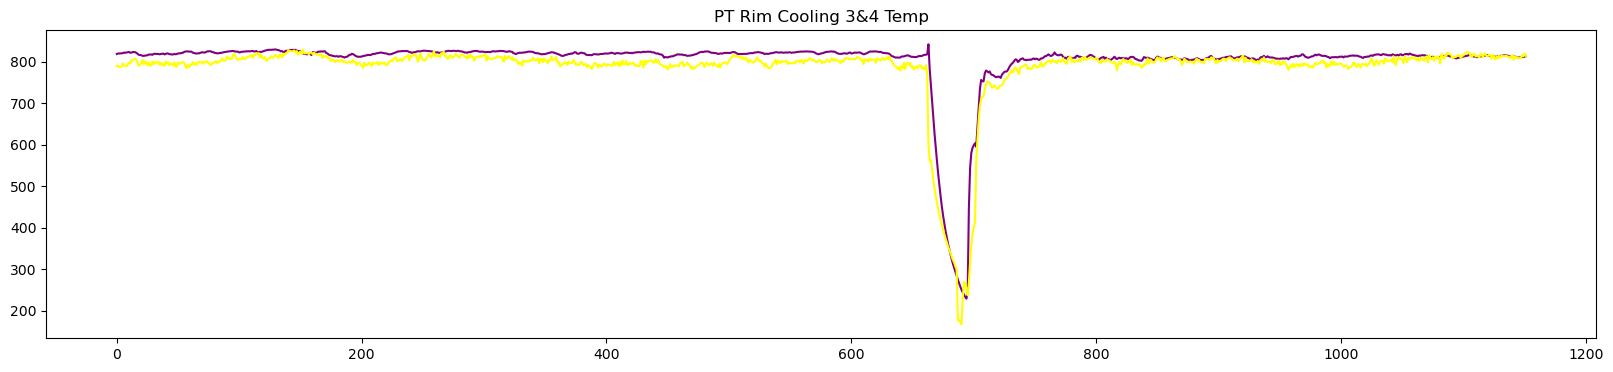

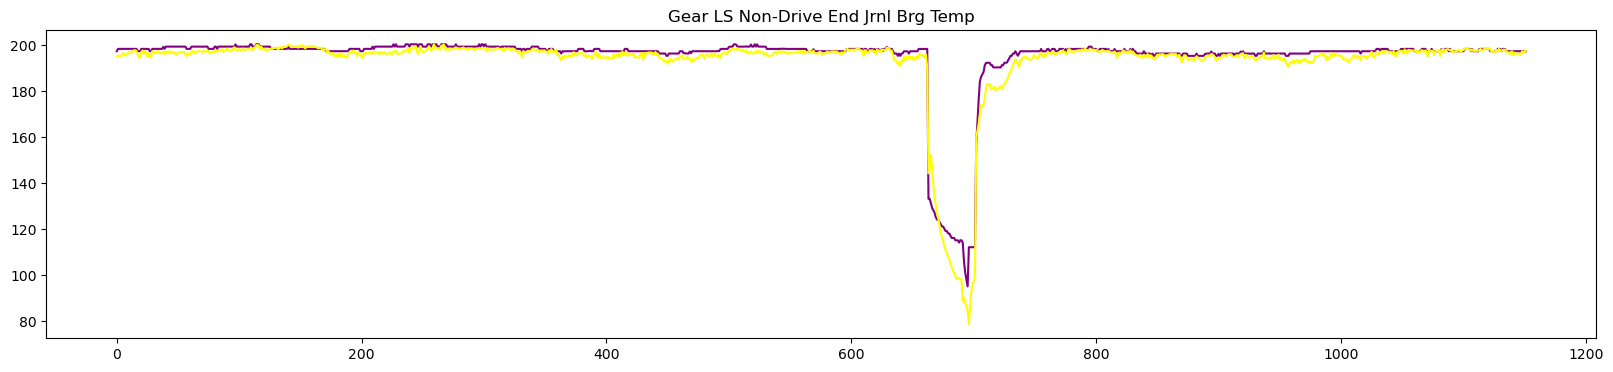

In [15]:
for i, col in enumerate(features):
    plt.figure(figsize=(20,4))
    plt.plot(data_test[col], color='purple')
    plt.plot(pred[i], color='yellow')
    plt.title(col)
    plt.show()